In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az 
from cmdstanpy import CmdStanModel
from statsmodels.nonparametric.smoothers_lowess import lowess

## Data preperation

In [4]:
weather = pd.read_csv('weather.csv')
smog_relation = pd.read_excel('smog_weather_data.xlsx')

In [5]:
smog_relation.head()

,datetime,temp,humidity,windspeed,winddir,precipprob,sealevelpressure,heating sezon,weekend,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
0,2022-01-01,9.8,93.3,25.1,246.6,1,1020.3,1,1,16.2,NaN,17.4
1,2022-01-02,8.5,89.1,26.8,228.9,1,1018.0,1,1,24.9,21.5,16.9
2,2022-01-03,8.8,72.0,37.5,239.8,1,1009.2,1,0,11.7,12.5,10.0
3,2022-01-04,7.9,82.8,24.4,214.1,1,1000.3,1,0,7.5,10.4,6.4
4,2022-01-05,5.0,90.0,28.7,244.6,1,1000.1,1,0,10.3,12.2,9.8


In [6]:
cols_to_drop = weather.columns[-5:]
weather = weather.drop(columns=cols_to_drop).set_index('datetime')
smog_relation = smog_relation.set_index('datetime')
weather.index = pd.to_datetime(weather.index)
smog_relation.index = pd.to_datetime(smog_relation.index, format='mixed')

In [8]:
# Bronowice
data_1 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Złoty Róg': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

In [9]:
# Nowa Huta
data_2 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Bulwarowa': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

In [10]:
# Swoszowice
data_3 = pd.merge(weather, smog_relation, left_index=True, right_index=True).rename(columns={'smog Swoszowice': 'smog'}).drop(columns=['name', 'preciptype','sunrise', 'sunset'])

## Data visualization

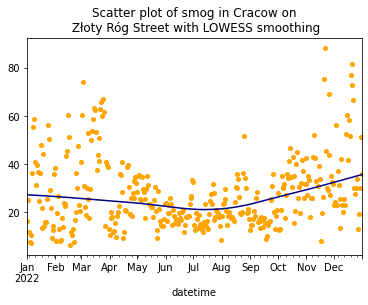

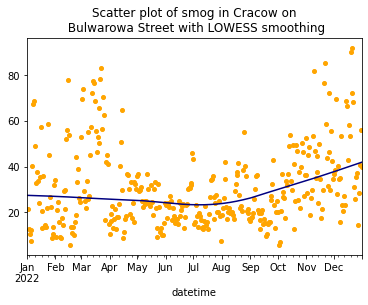

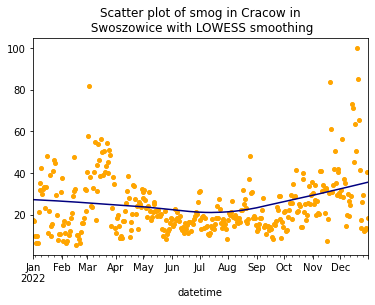

In [11]:
data_1.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_1.smog.values, data_1.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow on\n Złoty Róg Street with LOWESS smoothing')
plt.show()

data_2.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_2.smog.values, data_2.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow on\n Bulwarowa Street with LOWESS smoothing')
plt.show()

data_3.smog.plot(style='.', markersize=8, color='orange')
smoothed = lowess(data_1.smog.values, data_1.smog.index)
plt.plot(smoothed[:, 0].astype('datetime64[ns]'), smoothed[:, 1], color='navy')
plt.title('Scatter plot of smog in Cracow in\n Swoszowice with LOWESS smoothing')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


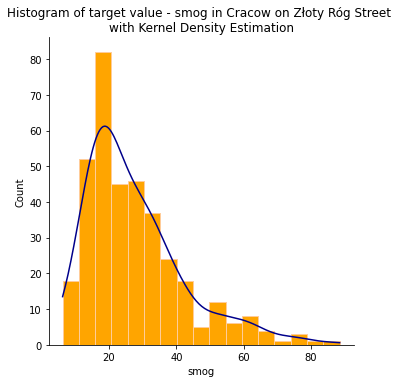

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


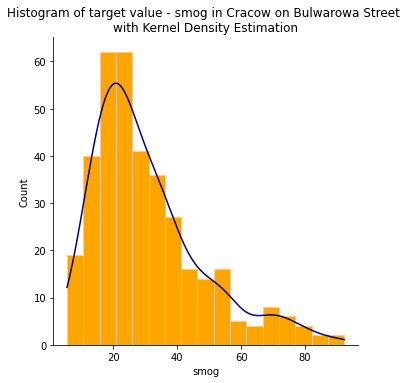

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


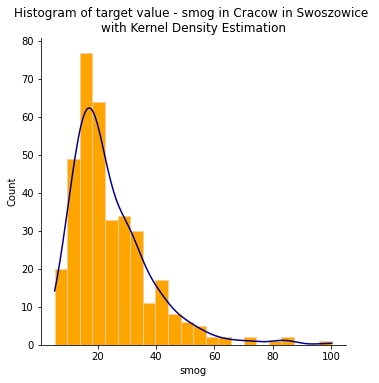

In [12]:
sns.displot(data_1['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow on Złoty Róg Street \nwith Kernel Density Estimation')
plt.show()

sns.displot(data_2['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow on Bulwarowa Street \nwith Kernel Density Estimation')
plt.show()

sns.displot(data_3['smog'], kde=True, color='darkblue', facecolor='orange', edgecolor="#ffcc99")
plt.title('Histogram of target value - smog in Cracow in Swoszowice \nwith Kernel Density Estimation')
plt.show()

## Differrence data

In [13]:
smog_relation.describe()

,temp,humidity,windspeed,winddir,precipprob,sealevelpressure,heating sezon,weekend,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,9.784110,75.118356,20.598356,177.084384,0.676712,1017.904932,0.624658,0.145205,27.579063,30.665934,24.464011
std,7.957246,13.351763,8.217480,102.871982,0.468374,8.131500,0.484876,0.352791,14.609631,17.128022,13.795016
min,-9.900000,43.200000,3.800000,8.100000,0.000000,995.500000,0.000000,0.000000,6.200000,5.500000,5.300000
25%,2.900000,64.800000,14.300000,50.700000,0.000000,1012.800000,0.000000,0.000000,17.300000,18.400000,15.075000
50%,9.900000,77.400000,19.000000,228.900000,1.000000,1018.300000,1.000000,0.000000,23.800000,25.600000,20.500000
75%,16.100000,86.000000,24.900000,253.400000,1.000000,1022.600000,1.000000,0.000000,34.600000,37.525000,30.825000
max,27.500000,97.600000,54.700000,354.800000,1.000000,1042.500000,1.000000,1.000000,88.500000,92.200000,100.300000


In [14]:
smog_relation['pressure_diff'] = smog_relation['sealevelpressure'] - smog_relation['sealevelpressure'].mean()

In [15]:
smog_relation['pressure_diff'].describe()

count    3.650000e+02
mean     4.858944e-14
std      8.131500e+00
min     -2.240493e+01
25%     -5.104932e+00
50%      3.950685e-01
75%      4.695068e+00
max      2.459507e+01
Name: pressure_diff, dtype: float64

## Pressure's influence on windspeed

In [16]:
%%writefile wind_speed_ppc.stan

generated quantities {
  real alpha = normal_rng(20, 1);
  real beta = normal_rng(0, 1);
  real sigma = normal_rng(10, 1);
  real pressure_diff = normal_rng(0, 10);
  real wind_speed = normal_rng(alpha + beta * pressure_diff, sigma);
}

Overwriting wind_speed_ppc.stan


In [17]:
%%writefile wind_speed_fit.stan

data {
  int<lower=0> N;  // number of observations
  vector[N] pressure;  // pressure data
  vector[N] wind_speed;  // wind speed data
}

parameters {
  real alpha;  // intercept for wind_speed ~ pressure
  real beta;  // coefficient for pressure
  real<lower=0> sigma;  // standard deviation for wind_speed ~ pressure
}

model {
  // Priors
  alpha ~ normal(20, 1);
  beta ~ normal(0, 1);
  sigma ~ normal(10, 1);

  // Likelihood
  wind_speed ~ normal(alpha + beta * pressure, sigma);
}

generated quantities {
    real wind_speed_hat[N] = normal_rng(alpha + beta * pressure, sigma);
}

Overwriting wind_speed_fit.stan


In [18]:
wind_speed_ppc = CmdStanModel(stan_file='./wind_speed_ppc.stan')

18:55:55 - cmdstanpy - INFO - compiling stan file /home/DA_project/wind_speed_ppc.stan to exe file /home/DA_project/wind_speed_ppc


18:56:08 - cmdstanpy - INFO - compiled model executable: /home/DA_project/wind_speed_ppc


In [19]:
wind_ppc = wind_speed_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
wind_ppc.summary()

18:56:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:56:08 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,20.007600,0.015739,1.00751,18.33730,19.999300,21.65790,4097.76,341480.0,0.999359
beta,-0.001337,0.015979,1.00705,-1.63979,-0.000185,1.65189,3971.75,330979.0,0.999984
sigma,10.016700,0.016250,0.99792,8.35568,10.022800,11.62200,3771.28,314273.0,1.000410
pressure_diff,0.237668,0.160250,10.35120,-16.69680,0.178100,17.08040,4172.44,347703.0,0.999458
wind_speed,19.816200,0.229669,14.51000,-3.50632,19.874500,43.19740,3991.45,332620.0,0.999351


In [20]:
wind_ppc_data = wind_ppc.draws_pd()

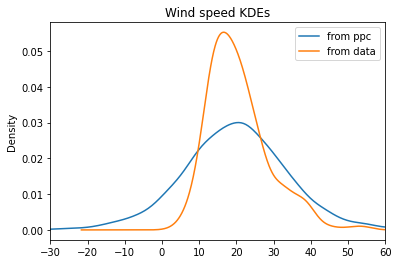

In [21]:
wind_ppc_data.wind_speed.plot.kde(label='from ppc')
smog_relation.windspeed.plot.kde(label='from data')
plt.xlim(-30, 60)
plt.legend()
plt.title("Wind speed KDEs")
plt.show()

In [22]:
smog_relation.windspeed.values.shape

(365,)

In [23]:
smog_relation.dropna(inplace=True)

In [24]:
pressure = smog_relation["pressure_diff"].values
windspeed = smog_relation["windspeed"].values

In [25]:
smog_relation["smog Bulwarowa"].describe()

count    361.000000
mean      30.655956
std       17.154645
min        5.500000
25%       18.400000
50%       25.500000
75%       37.200000
max       92.200000
Name: smog Bulwarowa, dtype: float64

In [26]:
wind_speed_fit = CmdStanModel(stan_file='./wind_speed_fit.stan')

18:56:09 - cmdstanpy - INFO - compiling stan file /home/DA_project/wind_speed_fit.stan to exe file /home/DA_project/wind_speed_fit
18:56:23 - cmdstanpy - INFO - compiled model executable: /home/DA_project/wind_speed_fit
18:56:23 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
18:56:23 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/DA_project/wind_speed_fit.hpp /home/DA_project/wind_speed_fit.stan
Warning in '/home/DA_project/wind_speed_fit.stan', line 25, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI

In [27]:
data = {
    'N': len(pressure),
    'pressure': pressure,
    'wind_speed': windspeed
}

fit = wind_speed_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit.summary())

18:56:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:56:23 - cmdstanpy - INFO - CmdStan done processing.
18:56:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/DA_project/wind_speed_fit.stan', line 21, column 2 to column 54)
Consider re-running with show_console=True if the above output is unclear!



                           Mean      MCSE    StdDev          5%         50%  \
lp__                -929.307000  0.078870  1.119030 -931.594000 -929.043000   
alpha                 20.553400  0.041411  0.336413   20.030100   20.573900   
beta                  -0.257684  0.003344  0.054279   -0.348352   -0.256685   
sigma                  8.166610  0.013567  0.295654    7.704150    8.163250   
wind_speed_hat[1]     20.037800  0.380637  8.622190    7.204530   20.059600   
...                         ...       ...       ...         ...         ...   
wind_speed_hat[357]   19.664500  0.406109  8.637260    3.793130   19.807600   
wind_speed_hat[358]   18.793200  0.356874  7.647270    6.723420   18.524700   
wind_speed_hat[359]   21.369200  0.418194  8.293010    7.480730   21.101800   
wind_speed_hat[360]   21.221500  0.420785  8.423740    6.524130   21.201200   
wind_speed_hat[361]   20.639300  0.439378  8.358780    7.196340   20.572900   

                            95%     N_Eff   N_Eff/

In [28]:
wind_fit_data = fit.draws_pd()

In [29]:
wind_fit_df = pd.DataFrame(wind_fit_data.loc[:, 'wind_speed_hat[1]':f'wind_speed_hat[{len(pressure)}]'].values.flatten())
wind_fit_df.columns = ["windspeed"]
wind_fit_df.head()

,windspeed
0,22.8942
1,21.9897
2,32.9990
3,13.0050
4,27.8444


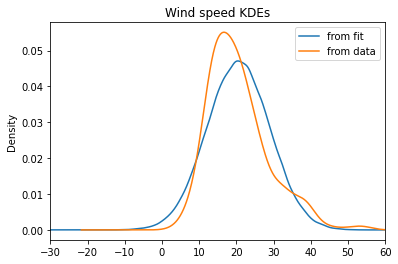

In [30]:
wind_fit_df.windspeed.plot.kde(label='from fit')
smog_relation.windspeed.plot.kde(label='from data')
plt.xlim(-30, 60)
plt.legend()
plt.title("Wind speed KDEs")
plt.show()

## Smog model

In [31]:
smog_relation.columns

Index(['temp', 'humidity', 'windspeed', 'winddir', 'precipprob',
       'sealevelpressure', 'heating sezon', 'weekend', 'smog Złoty Róg',
       'smog Bulwarowa', 'smog Swoszowice', 'pressure_diff'],
      dtype='object')

In [32]:
smog_data = smog_relation[[c for c in smog_relation.columns if 'smog' in c.lower()]]
smog_data.head()

,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
datetime,,,
2022-01-02,24.9,21.5,16.9
2022-01-03,11.7,12.5,10.0
2022-01-04,7.5,10.4,6.4
2022-01-05,10.3,12.2,9.8
2022-01-06,7.3,7.3,6.5


In [33]:
smog_data.describe()

,smog Złoty Róg,smog Bulwarowa,smog Swoszowice
count,361.000000,361.000000,361.000000
mean,27.654294,30.655956,24.435457
std,14.614040,17.154645,13.831978
min,6.200000,5.500000,5.300000
25%,17.400000,18.400000,15.000000
50%,23.800000,25.500000,20.500000
75%,34.700000,37.200000,30.700000
max,88.500000,92.200000,100.300000


In [34]:
df = smog_relation[["temp", "windspeed", "precipprob", "heating sezon", "weekend",  "smog Bulwarowa"]]


<Axes: xlabel='precipprob', ylabel='smog Bulwarowa'>

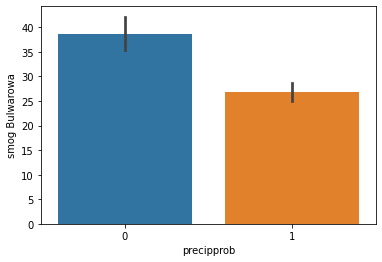

In [35]:
sns.barplot(data=df, x="precipprob", y="smog Bulwarowa")

In [36]:
precip_influence = df[df.precipprob == 1]["smog Bulwarowa"].mean() - df[df.precipprob == 0]["smog Bulwarowa"].mean()
precip_influence

-11.864557937508753

<Axes: xlabel='heating sezon', ylabel='smog Bulwarowa'>

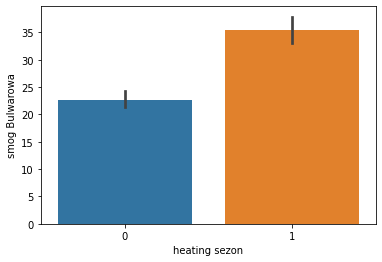

In [37]:
sns.barplot(data=df, x="heating sezon", y="smog Bulwarowa")

In [38]:
sezon_influence = df[df["heating sezon"] == 1]["smog Bulwarowa"].mean() - df[df["heating sezon"] == 0]["smog Bulwarowa"].mean()
sezon_influence

12.73185620915033

<Axes: xlabel='weekend', ylabel='smog Bulwarowa'>

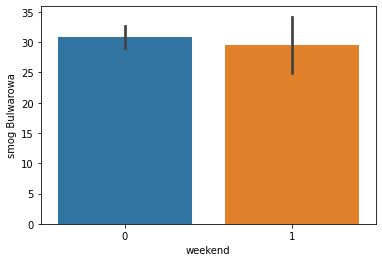

In [39]:
sns.barplot(data=df, x="weekend", y="smog Bulwarowa")

In [40]:
weekend_influence = df[df["weekend"] == 1]["smog Bulwarowa"].mean() - df[df["weekend"] == 0]["smog Bulwarowa"].mean()
weekend_influence

-1.278590988299726

In [41]:
df["weekend"].value_counts(normalize=True)

weekend
0    0.855956
1    0.144044
Name: proportion, dtype: float64

In [42]:
%%writefile smog_ppc.stan

generated quantities {
  real alpha = normal_rng(30, 2);
  real beta_temp = normal_rng(0, 1);
  real beta_ws = normal_rng(0, 1);
  real d_pp = normal_rng(-12, 1);
  real d_hs = normal_rng(13, 1);
  real d_wn = normal_rng(-1, 2);
  real<lower=0> sigma = normal_rng(15, 1);
    
  real windspeed = normal_rng(20, 10);
  int<lower=0, upper=1> precipprob = bernoulli_rng(0.67);
  int<lower=0, upper=1> heating_sezon = bernoulli_rng(0.62);
  int<lower=0, upper=1> weekend = bernoulli_rng(0.14);
  
  real temp = normal_rng(10, 8);
  
  real mean = alpha + beta_temp * temp + beta_ws * windspeed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
  real smog = normal_rng(mean, sigma);
}

Overwriting smog_ppc.stan


In [43]:
smog_ppc = CmdStanModel(stan_file='./smog_ppc.stan')

18:56:26 - cmdstanpy - INFO - compiling stan file /home/DA_project/smog_ppc.stan to exe file /home/DA_project/smog_ppc
18:56:39 - cmdstanpy - INFO - compiled model executable: /home/DA_project/smog_ppc


In [44]:
smog_ppc_samples = smog_ppc.sample(iter_warmup=1000, iter_sampling=1000, seed=6072023)
smog_ppc_samples.summary()

18:56:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:56:39 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
alpha,29.995600,0.032455,2.025890,26.68750,29.963200,33.39220,3896.41,149862.0,0.999329
beta_temp,0.001495,0.015547,0.982239,-1.63387,-0.018214,1.62199,3991.52,153520.0,0.999205
beta_ws,0.004984,0.016033,1.004250,-1.62672,0.004823,1.68936,3923.25,150894.0,1.000590
d_pp,-11.976600,0.016318,1.017600,-13.67470,-11.969700,-10.30420,3888.74,149567.0,0.999618
d_hs,13.001900,0.015678,0.989906,11.37650,12.982700,14.64770,3986.61,153331.0,0.999406
d_wn,-0.993808,0.031182,1.978750,-4.18639,-1.022110,2.25446,4026.93,154882.0,0.999241
sigma,15.018600,0.015827,0.989930,13.37670,15.033900,16.64680,3912.32,150474.0,0.999864
windspeed,19.998300,0.162769,10.176300,3.40939,19.949500,36.57630,3908.77,150337.0,0.999528
precipprob,0.662250,0.007810,0.473002,0.00000,1.000000,1.00000,3668.35,141090.0,0.999967
heating_sezon,0.623000,0.007971,0.484696,0.00000,1.000000,1.00000,3697.75,142221.0,0.999260


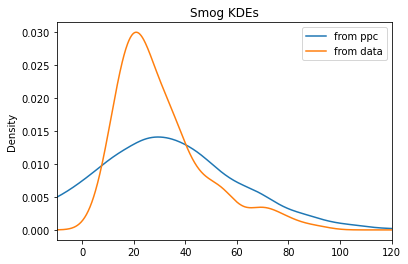

In [45]:
smog_ppc_samples.draws_pd().smog.plot.kde(label='from ppc')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

In [46]:
%%writefile smog_fit.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-12, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(-1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ normal(mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = normal_rng(mu[j], sigma);
        log_lik[j] = normal_lpdf(smog[j]|mu[j],sigma);
    }
}

Overwriting smog_fit.stan


In [47]:
%%writefile smog_fit_s.stan

data {
  int<lower=0> N;  
  vector[N] precipprob;  
  vector[N] wind_speed;
  vector[N] heating_sezon;
  vector[N] weekend;
  vector[N] temp;
  vector[N] smog;
}

parameters {
  real alpha;
  real beta_temp;
  real beta_ws;
  real d_pp;
  real d_hs;
  real d_wn;
  real<lower=0> sigma;
}

transformed parameters {
    vector[N] mu;
    mu = alpha + beta_temp * temp + beta_ws * wind_speed + d_pp * precipprob + d_hs * heating_sezon + d_wn * weekend;
}

model {
  // Priors
  alpha ~ normal(30, 2);
  beta_temp ~ normal(0, 1);
  beta_ws ~ normal(0, 1);
  d_pp ~ normal(-12, 1);
  d_hs ~ normal(13, 1);
  d_wn ~ normal(-1, 2);
  sigma ~ normal(15, 1);

  // Likelihood
  smog ~ student_t(1, mu, sigma);
}

generated quantities {
    vector[N] smog_hat;
    vector[N] log_lik;
    for (j in 1:N) {
        smog_hat[j] = student_t_rng(1, mu[j], sigma);
        log_lik[j] = student_t_lpdf(smog[j]|1, mu[j], sigma);
    }
}

Overwriting smog_fit_s.stan


In [48]:
smog_fit = CmdStanModel(stan_file='./smog_fit.stan')

18:56:40 - cmdstanpy - INFO - compiling stan file /home/DA_project/smog_fit.stan to exe file /home/DA_project/smog_fit
18:56:55 - cmdstanpy - INFO - compiled model executable: /home/DA_project/smog_fit


In [49]:
smog_fit_s = CmdStanModel(stan_file='./smog_fit_s.stan')

18:56:55 - cmdstanpy - INFO - compiling stan file /home/DA_project/smog_fit_s.stan to exe file /home/DA_project/smog_fit_s
18:57:11 - cmdstanpy - INFO - compiled model executable: /home/DA_project/smog_fit_s


In [50]:
data = {
    'N': len(df),
    'precipprob': df.precipprob.values,
    'wind_speed': df.windspeed.values,
    'temp': df.temp.values,
    'weekend': df.weekend.values,
    'heating_sezon': df['heating sezon'].values,
    'smog': df['smog Bulwarowa'].values
}

fit = smog_fit.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit.summary())

18:57:12 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:57:13 - cmdstanpy - INFO - CmdStan done processing.



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1137.790000  0.144195  1.878690 -1141.450000 -1137.600000   
alpha           37.841400  0.125989  1.692730    35.181300    37.920000   
beta_temp        0.030063  0.004857  0.094953    -0.127975     0.028095   
beta_ws         -0.498734  0.004973  0.078898    -0.639061    -0.494886   
d_pp           -10.514900  0.040585  0.823137   -11.880300   -10.495100   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.747890  0.004285  0.073615    -3.881030    -3.743060   
log_lik[358]    -3.609570  0.001718  0.033379    -3.668080    -3.608840   
log_lik[359]    -3.589920  0.001649  0.032676    -3.646710    -3.588770   
log_lik[360]    -4.574310  0.007335  0.119353    -4.782720    -4.574070   
log_lik[361]    -3.592160  0.002406  0.040307    -3.661410    -3.588500   

                      95%    N_Eff  N_Eff/s     R_hat  
lp__         -1135.380000  169.749  100.02

In [51]:
data = {
    'N': len(df),
    'precipprob': df.precipprob.values,
    'wind_speed': df.windspeed.values,
    'temp': df.temp.values,
    'weekend': df.weekend.values,
    'heating_sezon': df['heating sezon'].values,
    'smog': df['smog Bulwarowa'].values
}

fit_s = smog_fit_s.sample(data=data, iter_warmup=100, iter_sampling=100, seed=6072023)

print(fit_s.summary())

18:57:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:57:14 - cmdstanpy - INFO - CmdStan done processing.
18:57:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in '/home/DA_project/smog_fit_s.stan', line 38, column 2 to column 33)
Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in '/home/DA_project/smog_fit_s.stan', line 38, column 2 to column 33)
Consider re-running with show_console=True if the above output is unclear!



                     Mean      MCSE    StdDev           5%          50%  \
lp__         -1101.970000  0.160371  2.022730 -1105.750000 -1101.650000   
alpha           34.576600  0.104122  1.516660    32.089700    34.540200   
beta_temp        0.259296  0.004820  0.088744     0.106355     0.257022   
beta_ws         -0.549105  0.003393  0.067967    -0.676480    -0.553295   
d_pp            -9.769510  0.042454  0.847116   -11.150600    -9.766750   
...                   ...       ...       ...          ...          ...   
log_lik[357]    -3.527510  0.005835  0.127785    -3.776490    -3.508790   
log_lik[358]    -3.340290  0.003142  0.067860    -3.450890    -3.338160   
log_lik[359]    -3.358610  0.003199  0.068280    -3.467210    -3.358670   
log_lik[360]    -5.405890  0.005676  0.103598    -5.566960    -5.403650   
log_lik[361]    -3.430310  0.006311  0.107270    -3.630080    -3.415920   

                      95%    N_Eff   N_Eff/s     R_hat  
lp__         -1099.390000  159.082   63.4

In [52]:
smog_fit_data = fit.draws_pd()
smog_fit_data.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_temp,beta_ws,...,log_lik[352],log_lik[353],log_lik[354],log_lik[355],log_lik[356],log_lik[357],log_lik[358],log_lik[359],log_lik[360],log_lik[361]
0,-1140.82,0.976002,0.034654,7.0,127.0,0.0,1144.39,36.8549,-0.068156,-0.266617,...,-6.22011,-3.59308,-3.61162,-3.58953,-3.67554,-3.96220,-3.61791,-3.61581,-4.75188,-3.59596
1,-1143.55,0.732982,0.034654,7.0,127.0,0.0,1147.67,35.0646,0.013494,-0.416022,...,-5.63858,-3.63958,-3.62354,-3.57018,-3.60955,-3.94215,-3.66744,-3.59096,-4.40845,-3.63530
2,-1139.32,0.911130,0.034654,6.0,63.0,0.0,1144.49,35.3397,0.199700,-0.565992,...,-5.79144,-3.59959,-3.57372,-3.57190,-3.70365,-3.68834,-3.60037,-3.57412,-4.56905,-3.58626
3,-1139.80,0.925477,0.034654,7.0,127.0,0.0,1142.36,35.7950,-0.053872,-0.289099,...,-6.11011,-3.60929,-3.62336,-3.60243,-3.68791,-3.94499,-3.63252,-3.63132,-4.70969,-3.66654
4,-1138.52,0.957238,0.034654,7.0,127.0,0.0,1142.35,38.9784,-0.123442,-0.552863,...,-5.52595,-3.63132,-3.58607,-3.57474,-3.66462,-3.74117,-3.64868,-3.58725,-4.40254,-3.58187


In [53]:
smog_fit_df = pd.DataFrame(smog_fit_data.loc[:, 'smog_hat[1]':f'smog_hat[{len(df)}]'].values.flatten())
smog_fit_df.columns = ["smog"]
smog_fit_df.head()

,smog
0,49.47190
1,38.96000
2,31.93690
3,1.33853
4,4.02125


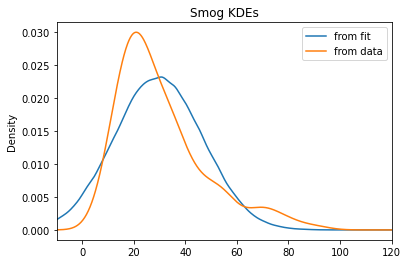

In [54]:
smog_fit_df.smog.plot.kde(label='from fit')
smog_relation["smog Bulwarowa"].plot.kde(label='from data')
plt.xlim(-10, 120)
plt.legend()
plt.title("Smog KDEs")
plt.show()

## LOO/WAIC for smog

In [55]:
fit_normal = az.from_cmdstanpy(posterior=fit, posterior_predictive = 'smog_hat', observed_data = {'smog': df["smog Bulwarowa"]})
fit_student= az.from_cmdstanpy(posterior=fit_s, posterior_predictive = 'smog_hat', observed_data = {'smog': df["smog Bulwarowa"]})

model_dict = {"Smog Fit Normal Model": fit_normal, "Smog Fit T_Student Model": fit_student}

                          rank     elpd_loo     p_loo  elpd_diff    weight  \
Smog Fit Normal Model        0  2925.820563  4.300982   0.000000  0.931408   
Smog Fit T_Student Model     1  2988.749887  4.968465  62.929324  0.068592   

                                 se        dse  warning     scale  
Smog Fit Normal Model     33.276718   0.000000    False  deviance  
Smog Fit T_Student Model  31.847737  17.024722    False  deviance  


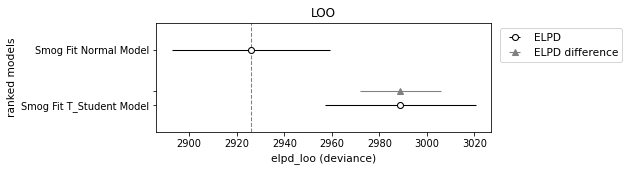

In [56]:
model_comparison = az.compare(model_dict, ic="loo", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

                          rank    elpd_waic    p_waic  elpd_diff    weight  \
Smog Fit Normal Model        0  2925.728118  4.254760   0.000000  0.931454   
Smog Fit T_Student Model     1  2988.658242  4.922643  62.930123  0.068546   

                                 se       dse  warning     scale  
Smog Fit Normal Model     33.268463   0.00000    False  deviance  
Smog Fit T_Student Model  31.847766  17.02156    False  deviance  


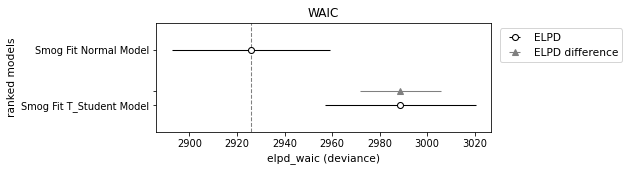

In [57]:
model_comparison = az.compare(model_dict, ic="waic", method="stacking", scale="deviance")

print(model_comparison.head())
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()